In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
info_original = pd.read_csv('BX-Books.csv',sep=';', on_bad_lines='skip', encoding='latin-1', low_memory=False).sort_values('ISBN')
info_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271360 entries, 254249 to 179422
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [3]:
info_original.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
254249,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
215806,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
42562,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
112555,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
42604,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...


In [4]:
info_original.shape

(271360, 8)

In [5]:
ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';', encoding='latin-1')
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
ratings.shape

(1149780, 3)

In [8]:
users = pd.read_csv('BX-Users.csv',sep=';', encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


There isn't much data available here

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
users.shape

(278858, 3)

In [11]:
meta = pd.read_csv('Preprocessed_data.csv', encoding='latin-1')
meta.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [12]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [13]:
meta.shape

(1031175, 19)

It would have been nice if we had found this data from the beginning, but we found it belatedly and decided to use only meta data

# Data Visualization

Text(0.5, 0, 'Number of times users have evaluated')

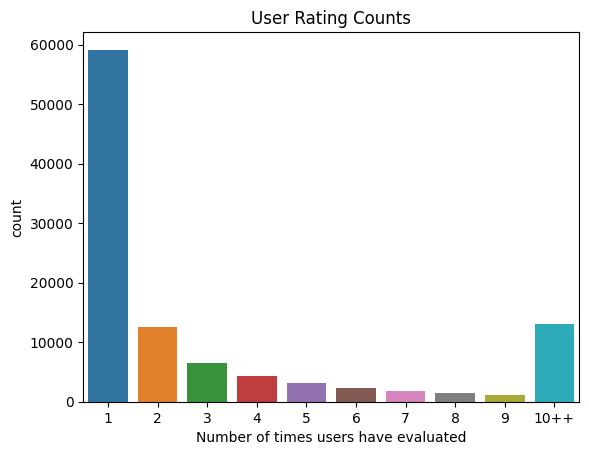

In [14]:
ratings_group = ratings.groupby('User-ID').count()
ratings_group.loc[ratings_group['ISBN'] > 10,'ISBN'] = 10

plt.title('User Rating Counts')
sns.countplot(x = 'ISBN', data = ratings_group, order = [1,2,3,4,5,6,7,8,9,10])
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10++"])
plt.xlabel("Number of times users have evaluated")

Text(0.5, 0, 'Number of times a book has been evaluated')

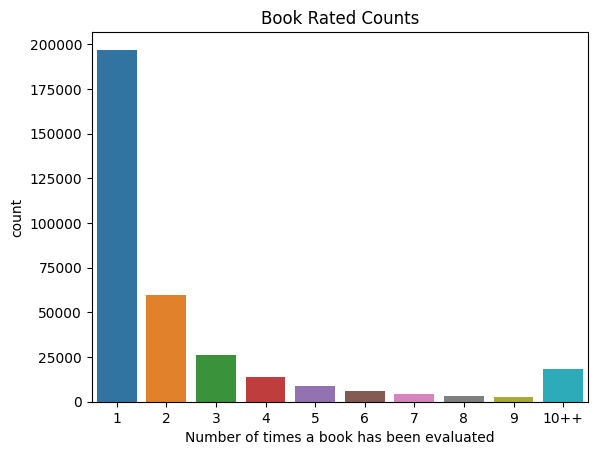

In [15]:
books_group = ratings.groupby('ISBN').count()
books_group.loc[books_group['User-ID'] > 10,'User-ID'] = 10

plt.title('Book Rated Counts')
sns.countplot(x = 'User-ID', data = books_group, order = [1,2,3,4,5,6,7,8,9,10])
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1","2","3","4","5","6","7","8","9","10++"])
plt.xlabel("Number of times a book has been evaluated")

There are many materials that have been evaluated and evaluated only once.

<AxesSubplot:title={'center':'Rating Counts'}, xlabel='Book-Rating', ylabel='count'>

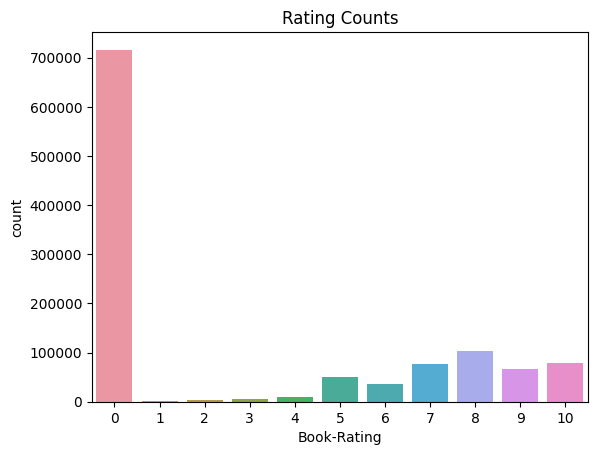

In [16]:
plt.title('Rating Counts')
sns.countplot(x = 'Book-Rating', data = ratings)

There's a lot of data that got zero points.

In [17]:
info_original.loc[(info_original['Book-Title'] == 'Hamlet') & (info_original['Book-Author'] == 'William Shakespeare'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
136553,0451517636,Hamlet,William Shakespeare,1978,Signet Book,http://images.amazon.com/images/P/0451517636.0...,http://images.amazon.com/images/P/0451517636.0...,http://images.amazon.com/images/P/0451517636.0...
207388,0451519272,Hamlet,William Shakespeare,1978,Signet Book,http://images.amazon.com/images/P/0451519272.0...,http://images.amazon.com/images/P/0451519272.0...,http://images.amazon.com/images/P/0451519272.0...
186750,0451520610,Hamlet,William Shakespeare,1978,Signet Book,http://images.amazon.com/images/P/0451520610.0...,http://images.amazon.com/images/P/0451520610.0...,http://images.amazon.com/images/P/0451520610.0...
47934,0671463969,Hamlet,William Shakespeare,1990,Pocket Books (Mm),http://images.amazon.com/images/P/0671463969.0...,http://images.amazon.com/images/P/0671463969.0...,http://images.amazon.com/images/P/0671463969.0...
10466,067172262X,Hamlet,William Shakespeare,1992,Washington Square Press,http://images.amazon.com/images/P/067172262X.0...,http://images.amazon.com/images/P/067172262X.0...,http://images.amazon.com/images/P/067172262X.0...
108130,0764120840,Hamlet,William Shakespeare,2002,Barron's Educational Series,http://images.amazon.com/images/P/0764120840.0...,http://images.amazon.com/images/P/0764120840.0...,http://images.amazon.com/images/P/0764120840.0...
85713,0886460158,Hamlet,William Shakespeare,1985,Dh Audio,http://images.amazon.com/images/P/0886460158.0...,http://images.amazon.com/images/P/0886460158.0...,http://images.amazon.com/images/P/0886460158.0...
91367,8437610974,Hamlet,William Shakespeare,1994,Ediciones Catedra S.A.,http://images.amazon.com/images/P/8437610974.0...,http://images.amazon.com/images/P/8437610974.0...,http://images.amazon.com/images/P/8437610974.0...


There are many data with different ISBNs in the same book.